In [6]:
import pathlib
# import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from time import time

ROOT = pathlib.Path().absolute().parent
RAW_DATA_PATH = ROOT / 'data' / 'raw'
PROCESSED_DATA_PATH = ROOT / 'data' / 'processed'

In [2]:
df = pd.read_pickle(PROCESSED_DATA_PATH / 'aggregated_dataset.pickle')
df

snap       sales  \
                                                    snap   HOUSEHOLD   
                                                    snap HOUSEHOLD_2   
state_id store_id date       year month weekday                        
CA       CA_1     2011-01-29 2011 1     Saturday   False         181   
                  2011-01-30 2011 1     Sunday     False         170   
                  2011-01-31 2011 1     Monday     False         114   
                  2011-02-01 2011 2     Tuesday     True         123   
                  2011-02-02 2011 2     Wednesday   True         135   
...                                                  ...         ...   
WI       WI_3     2016-04-20 2016 4     Wednesday  False         148   
                  2016-04-21 2016 4     Thursday   False         142   
                  2016-04-22 2016 4     Friday     False         166   
                  2016-04-23 2016 4     Saturday   False         232   
                  2016-04-24 2016 4     Sunday     False         201   

                                                                         \
                                                                HOBBIES   
                                                  HOUSEHOLD_1 HOBBIES_2   
state_id store_id date       year month weekday                           
CA       CA_1     2011-01-29 2011 1     Saturday          361        28   
                  2011-01-30 2011 1     Sunday            350         9   
                  2011-01-31 2011 1     Monday            279         6   
                  2011-02-01 2011 2     Tuesday           278         9   
                  2011-02-02 2011 2     Wednesday         195         5   
...                                                       ...       ...   
WI       WI_3     2016-04-20 2016 4     Wednesday         535        42   
                  2016-04-21 2016 4     Thursday          573        21   
                  2016-04-22 2016 4     Friday            701        32   
                  2016-04-23 2016 4     Saturday          801        32   
                  2016-04-24 2016 4     Sunday            766        21   

                                                                             \
                                                              FOODS           
                                                  HOBBIES_1 FOODS_3 FOODS_2   
state_id store_id date       year month weekday                               
CA       CA_1     2011-01-29 2011 1     Saturday        528    2268     674   
                  2011-01-30 2011 1     Sunday          489    2198     655   
                  2011-01-31 2011 1     Monday          409    1398     396   
                  2011-02-01 2011 2     Tuesday         383    1607     476   
                  2011-02-02 2011 2     Wednesday       263    1496     354   
...                                                     ...     ...     ...   
WI       WI_3     2016-04-20 2016 4     Wednesday       202    1579     473   
                  2016-04-21 2016 4     Thursday        182    1670     411   
                  2016-04-22 2016 4     Friday          264    1897     507   
                  2016-04-23 2016 4     Saturday        381    2411     505   
                  2016-04-24 2016 4     Sunday          230    2233     557   

                                                            events            \
                                                              type             
                                                  FOODS_1 sporting religious   
state_id store_id date       year month weekday                                
CA       CA_1     2011-01-29 2011 1     Saturday      297    False     False   
                  2011-01-30 2011 1     Sunday        284    False     False   
                  2011-01-31 2011 1     Monday        214    False     False   
                  2011-02-01 2011 2     Tuesday       175    False     False   
                  2

In [72]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 19130 entries, ('CA', 'CA_1', Timestamp('2011-01-29 00:00:00'), 2011, '1', 'Saturday') to ('WI', 'WI_3', Timestamp('2016-04-24 00:00:00'), 2016, '4', 'Sunday')
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   (snap, snap, snap)                   19130 non-null  bool 
 1   (sales, HOUSEHOLD, HOUSEHOLD_2)      19130 non-null  int16
 2   (sales, HOUSEHOLD, HOUSEHOLD_1)      19130 non-null  int16
 3   (sales, HOBBIES, HOBBIES_2)          19130 non-null  int16
 4   (sales, HOBBIES, HOBBIES_1)          19130 non-null  int16
 5   (sales, FOODS, FOODS_3)              19130 non-null  int16
 6   (sales, FOODS, FOODS_2)              19130 non-null  int16
 7   (sales, FOODS, FOODS_1)              19130 non-null  int16
 8   (events, type, sporting)             19130 non-null  bool 
 9   (events, type, religious)            19130 non-n

In [71]:
tmp = \
(df
.loc[:, ('sales')]
.sum(axis=1)
.rename('sales')
.groupby(['store_id','state_id'])
.resample('M', level='date')
.sum()
.reset_index())
tmp
px.line(tmp, x='date', y='sales', color='store_id', facet_col='state_id')

In [8]:
px.line(df.loc[:, ('sales')].sum(axis=1).rename('sales').reset_index(), x='date', y='sales', color='store_id', facet_col='state_id')

In [2]:
df = pd.read_parquet(PROCESSED_DATA_PATH / 'combined_dataset.parquet')

In [4]:
df.head()

,item_id,dept_id,cat_id,store_id,state_id,sales,date,weekday,month,year,...,event_name_presidentsday,event_name_purim end,event_name_ramadan starts,event_name_stpatricksday,event_name_superbowl,event_name_thanksgiving,event_name_valentinesday,event_name_veteransday,event,sell_price_cent
0,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,2011-01-29,Saturday,1,2011,...,False,False,False,False,False,False,False,False,False,46
1,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,15,2011-01-30,Sunday,1,2011,...,False,False,False,False,False,False,False,False,False,46
2,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-31,Monday,1,2011,...,False,False,False,False,False,False,False,False,False,46
3,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-02-01,Tuesday,2,2011,...,False,False,False,False,False,False,False,False,False,46
4,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-02-02,Wednesday,2,2011,...,False,False,False,False,False,False,False,False,False,46


In [26]:
df.columns

Index(['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'sales', 'date',
       'weekday', 'month', 'year', 'snap', 'event_type_cultural',
       'event_type_national', 'event_type_religious', 'event_type_sporting',
       'event_name_chanukah end', 'event_name_christmas',
       'event_name_cinco de mayo', 'event_name_columbusday',
       'event_name_easter', 'event_name_eid al-fitr', 'event_name_eidaladha',
       'event_name_father's day', 'event_name_halloween',
       'event_name_independenceday', 'event_name_laborday',
       'event_name_lentstart', 'event_name_lentweek2',
       'event_name_martinlutherkingday', 'event_name_memorialday',
       'event_name_mother's day', 'event_name_nbafinalsend',
       'event_name_nbafinalsstart', 'event_name_newyear',
       'event_name_orthodoxchristmas', 'event_name_orthodoxeaster',
       'event_name_pesach end', 'event_name_presidentsday',
       'event_name_purim end', 'event_name_ramadan starts',
       'event_name_stpatricksday'

In [2]:
# read in the combined dataset
df = pd.read_parquet(PROCESSED_DATA_PATH / 'combined_dataset.parquet')

# how will the columns be aggregated
to_agg = {'sales':'sum'}
to_agg.update({x:'first' for x in df.columns if x.startswith('event_') or x=='snap'})

# groupby everything except item_id and columns top aggregate
aggregated_sales = \
(df
# .sample(frac=0.001)
.groupby(['state_id','store_id','date','year','month','weekday','cat_id','dept_id'], observed=True)
.agg(to_agg)
.astype({'sales':'int16'})
.sort_index(axis=1))

# create a boolean calendar which can join the aggregated data
aggregated_calendar = \
(aggregated_sales
.drop(columns=['sales'])
.groupby(['state_id','store_id','date','year','month','weekday'], observed=True)
.first())
aggregated_calendar = pd.concat([aggregated_calendar], keys=['events'], axis=1)

# unstack the category and department indices for more intuitive indexing
aggregated_sales = \
(aggregated_sales
[['sales']]
.unstack(['cat_id','dept_id'], fill_value=0)
['sales'])

# join in the boolean calendar
aggregated_sales = \
(aggregated_calendar
.join(aggregated_sales)
.sort_index(axis=1, ascending=False)
.sort_index(axis=0))

aggregated_sales
# aggregated_sales.to_feather(PROCESSED_DATA_PATH / 'aggregated_dataset.feather')

events                      \
                                                    snap event_type_sporting   
state_id store_id date       year month weekday                                
CA       CA_1     2011-01-29 2011 1     Saturday   False               False   
                  2011-01-30 2011 1     Sunday     False               False   
                  2011-01-31 2011 1     Monday     False               False   
                  2011-02-01 2011 2     Tuesday     True               False   
                  2011-02-02 2011 2     Wednesday   True               False   
...                                                  ...                 ...   
WI       WI_3     2016-04-20 2016 4     Wednesday  False               False   
                  2016-04-21 2016 4     Thursday   False               False   
                  2016-04-22 2016 4     Friday     False               False   
                  2016-04-23 2016 4     Saturday   False               False   
                  2016-04-24 2016 4     Sunday     False               False   

                                                                        \
                                                  event_type_religious   
state_id store_id date       year month weekday                          
CA       CA_1     2011-01-29 2011 1     Saturday                 False   
                  2011-01-30 2011 1     Sunday                   False   
                  2011-01-31 2011 1     Monday                   False   
                  2011-02-01 2011 2     Tuesday                  False   
                  2011-02-02 2011 2     Wednesday                False   
...                                                                ...   
WI       WI_3     2016-04-20 2016 4     Wednesday                False   
                  2016-04-21 2016 4     Thursday                 False   
                  2016-04-22 2016 4     Friday                   False   
                  2016-04-23 2016 4     Saturday                 False   
                  2016-04-24 2016 4     Sunday                   False   

                                                                       \
                                                  event_type_national   
state_id store_id date       year month weekday                         
CA       CA_1     2011-01-29 2011 1     Saturday                False   
                  2011-01-30 2011 1     Sunday                  False   
                  2011-01-31 2011 1     Monday                  False   
                  2011-02-01 2011 2     Tuesday                 False   
                  2011-02-02 2011 2     Wednesday               False   
...                                                               ...   
WI       WI_3     2016-04-20 2016 4     Wednesday               False   
                  2016-04-21 2016 4     Thursday                False   
                  2016-04-22 2016 4     Friday                  False   
                  2016-04-23 2016 4     Saturday                False   
                  2016-04-24 2016 4     Sunday                  False   

                                                                       \
                                                  event_type_cultural   
state_id store_id date       year month weekday                         
CA       CA_1     2011-01-29 2011 1     Saturday                False   
                  2011-01-30 2011 1     Sunday                  False   
                  2011-01-31 2011 1     Monday                  False   
                  2011-02-01 2011 2     Tuesday                 False   
                  2011-02-02 2011 2     Wednesday               False   
...                                                               ...   
WI       WI_3     2016-04-20 2016 4     Wednesday               False   
                  2016-04-21 2016 4     Thursday                False   
                  2016-04-22 2016 4     Friday                  Fa

In [6]:
aggregated_sales.to_pickle(PROCESSED_DATA_PATH / 'aggregated_dataset.pickle')

In [7]:
pd.read_pickle(PROCESSED_DATA_PATH / 'aggregated_dataset.pickle')

events                      \
                                                    snap event_type_sporting   
state_id store_id date       year month weekday                                
CA       CA_1     2011-01-29 2011 1     Saturday   False               False   
                  2011-01-30 2011 1     Sunday     False               False   
                  2011-01-31 2011 1     Monday     False               False   
                  2011-02-01 2011 2     Tuesday     True               False   
                  2011-02-02 2011 2     Wednesday   True               False   
...                                                  ...                 ...   
WI       WI_3     2016-04-20 2016 4     Wednesday  False               False   
                  2016-04-21 2016 4     Thursday   False               False   
                  2016-04-22 2016 4     Friday     False               False   
                  2016-04-23 2016 4     Saturday   False               False   
                  2016-04-24 2016 4     Sunday     False               False   

                                                                        \
                                                  event_type_religious   
state_id store_id date       year month weekday                          
CA       CA_1     2011-01-29 2011 1     Saturday                 False   
                  2011-01-30 2011 1     Sunday                   False   
                  2011-01-31 2011 1     Monday                   False   
                  2011-02-01 2011 2     Tuesday                  False   
                  2011-02-02 2011 2     Wednesday                False   
...                                                                ...   
WI       WI_3     2016-04-20 2016 4     Wednesday                False   
                  2016-04-21 2016 4     Thursday                 False   
                  2016-04-22 2016 4     Friday                   False   
                  2016-04-23 2016 4     Saturday                 False   
                  2016-04-24 2016 4     Sunday                   False   

                                                                       \
                                                  event_type_national   
state_id store_id date       year month weekday                         
CA       CA_1     2011-01-29 2011 1     Saturday                False   
                  2011-01-30 2011 1     Sunday                  False   
                  2011-01-31 2011 1     Monday                  False   
                  2011-02-01 2011 2     Tuesday                 False   
                  2011-02-02 2011 2     Wednesday               False   
...                                                               ...   
WI       WI_3     2016-04-20 2016 4     Wednesday               False   
                  2016-04-21 2016 4     Thursday                False   
                  2016-04-22 2016 4     Friday                  False   
                  2016-04-23 2016 4     Saturday                False   
                  2016-04-24 2016 4     Sunday                  False   

                                                                       \
                                                  event_type_cultural   
state_id store_id date       year month weekday                         
CA       CA_1     2011-01-29 2011 1     Saturday                False   
                  2011-01-30 2011 1     Sunday                  False   
                  2011-01-31 2011 1     Monday                  False   
                  2011-02-01 2011 2     Tuesday                 False   
                  2011-02-02 2011 2     Wednesday               False   
...                                                               ...   
WI       WI_3     2016-04-20 2016 4     Wednesday               False   
                  2016-04-21 2016 4     Thursday                False   
                  2016-04-22 2016 4     Friday                  Fa

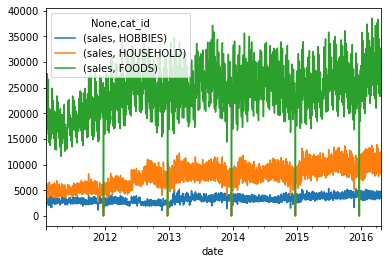

In [11]:
(df
# .sample(frac=0.01)
.groupby(['cat_id','date'], observed=True)
.agg({'sales':'sum'})
.unstack('cat_id')
.plot()
# .plot(x='date',y='sales', subplots=True, layout=(1,3))
)

In [210]:
# import dask.dataframe as dd
# dff = dd.read_parquet(PROCESSED_DATA_PATH / 'combined_dataset.parquet').persist()